## Kütüphane Ve İlk Gözlemler (Data Understanding)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setlerini yükleyelim
athlete_events = pd.read_csv('C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/Analyzing 120 Years of Olympic History Data/Data_Sets/athlete_events.csv')
country_defs = pd.read_csv('C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/Analyzing 120 Years of Olympic History Data/Data_Sets/country_definitions.csv')


# NOC kodları üzerinden tabloları birleştirelim (Left Join)
df = pd.merge(athlete_events, country_defs, on='NOC', how='left')

# İlk 5 satıra göz atalım
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [43]:
#Son 5 satıra göz atalım
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [49]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  str    
 2   Sex     271116 non-null  str    
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  str    
 7   NOC     271116 non-null  str    
 8   Games   271116 non-null  str    
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  str    
 11  City    271116 non-null  str    
 12  Sport   271116 non-null  str    
 13  Event   271116 non-null  str    
 14  Medal   39783 non-null   str    
 15  region  270746 non-null  str    
 16  notes   5039 non-null    str    
dtypes: float64(3), int64(2), str(12)
memory usage: 35.2 MB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [53]:
print(f'Eksik veriler:\n{df.isna().sum()}')

Eksik veriler:
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64


## Veri Temizleme İşlemi (Data Cleaning)

In [54]:
df['Medal'] = df['Medal'].fillna('no medal')

In [56]:
df[['Name','Medal']].head()

,Name,Medal
0,A Dijiang,no medal
1,A Lamusi,no medal
2,Gunnar Nielsen Aaby,no medal
3,Edgar Lindenau Aabye,Gold
4,Christine Jacoba Aaftink,no medal


In [60]:
df['region'] = df['region'].fillna(df['NOC'])
df['region'].isna().sum()

np.int64(0)

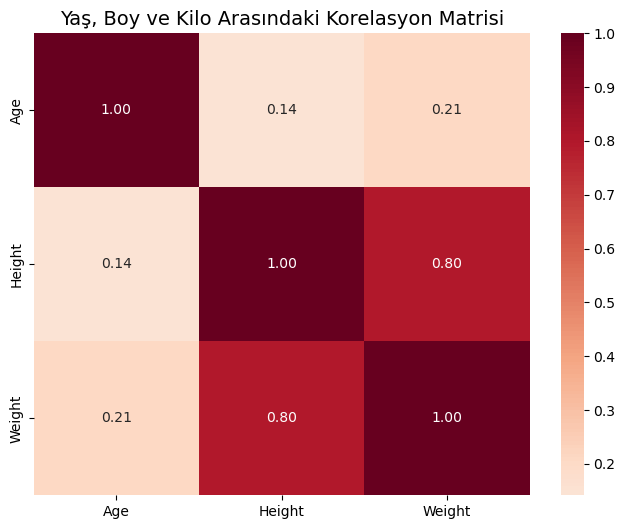

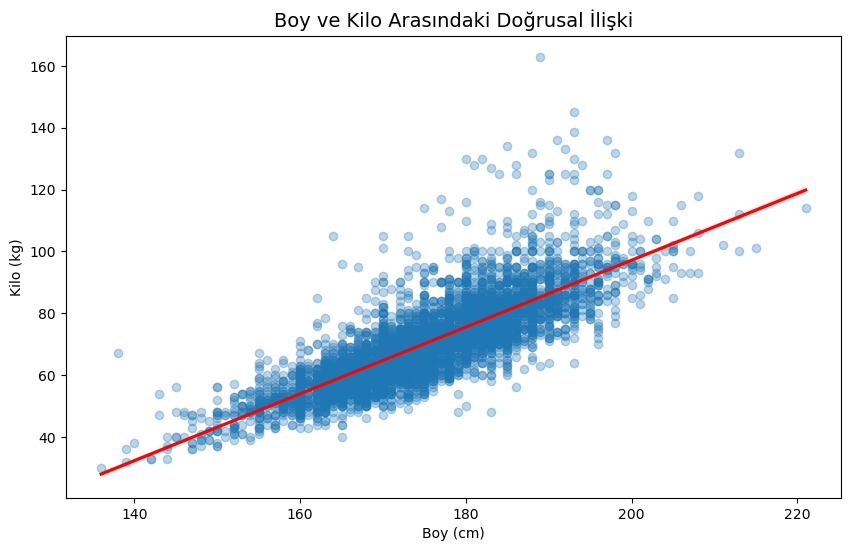

In [87]:
# 1. Sayısal sütunları seçelim ve eksik verileri temizleyelim
corr_data = athlete_events[['Age', 'Height', 'Weight']].dropna()

# 2. Korelasyon matrisini hesaplayalım
correlation_matrix = corr_data.corr()

# Görselleştirme 1: Heatmap (Isı Haritası)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Yaş, Boy ve Kilo Arasındaki Korelasyon Matrisi', fontsize=14)
plt.show()

# Görselleştirme 2: Boy ve Kilo İlişkisi (Regresyon Analizi)
# Veri çok büyük olduğu için 5000 örneklem üzerinden trendi görelim
sample_data = corr_data.sample(5000, random_state=42)
plt.figure(figsize=(10, 6))
sns.regplot(data=sample_data, x='Height', y='Weight', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Boy ve Kilo Arasındaki Doğrusal İlişki', fontsize=14)
plt.xlabel('Boy (cm)')
plt.ylabel('Kilo (kg)')
plt.show()

# 📊 Yaş, Boy ve Kilo Arasındaki İlişkiler: Korelasyon ve Doğrusal Analiz

Bu bölümde iki tamamlayıcı görsel üzerinden biyometrik değişkenler arasındaki ilişkiler incelenmektedir:

1. **Korelasyon Matrisi (Heatmap)** → İlişkinin gücü ve yönü  
2. **Saçılım Grafiği + Regresyon Doğrusu** → İlişkinin formu ve dağılım yapısı  

Bu iki yaklaşım birlikte kullanıldığında hem istatistiksel hem de gerçek dünya temelli güçlü çıkarımlar elde edilir.

---

## 🔥 Korelasyon Matrisi: İstatistiksel Okuma

Korelasyon katsayısı (r), iki değişken arasındaki doğrusal ilişkinin gücünü gösterir.

| Değişkenler | Korelasyon (r) | Yorum |
|-------------|----------------|-------|
| Age – Height | 0.14 | Çok zayıf pozitif |
| Age – Weight | 0.21 | Zayıf pozitif |
| Height – Weight | 0.80 | Güçlü pozitif |

---

### 📌 Boy – Kilo (r = 0.80)

- Oldukça güçlü bir pozitif korelasyon vardır.
- Boy arttıkça kilo da artma eğilimindedir.
- Doğrusal modele yüksek uyum beklenir.

**İstatistiksel anlamı:**
- Varyansın büyük kısmı açıklanabilir.
- Regresyon modellerinde güvenilir öngörü değişkenidir.

---

### 📌 Yaş – Boy (r = 0.14)

- Çok zayıf bir ilişki vardır.
- Yaş arttıkça boyun anlamlı biçimde değişmediğini gösterir.

**Sebep:**
- Boy, biyolojik olarak belirli bir yaştan sonra sabitlenir.

---

### 📌 Yaş – Kilo (r = 0.21)

- Zayıf pozitif ilişki mevcuttur.
- Yaş ilerledikçe kilo artışı eğilimi vardır ancak güçlü değildir.

**İstatistiksel yorum:**
- Kilo üzerinde yaş dışında çok sayıda değişken etkilidir.

---

## 📈 Saçılım Grafiği: Boy – Kilo Doğrusal İlişkisi

Scatter plot, korelasyonun görsel doğrulamasını sağlar.

Grafikte:

- X ekseni → Boy (cm)  
- Y ekseni → Kilo (kg)  
- Kırmızı çizgi → Doğrusal regresyon doğrusu  

---

### 🔍 İstatistiksel Bulgular

1. **Pozitif eğim:**  
   Regresyon doğrusu yukarı yönlüdür → Boy arttıkça kilo artar.

2. **Yoğunluk kümesi:**  
   Veri noktaları 165–185 cm ve 60–90 kg bandında yoğunlaşmıştır.

3. **Saçılım genişliği:**  
   Boy yükseldikçe kilo varyansı da artmaktadır.

Bu durum **heteroskedastisite** işareti olabilir.

---

## 🧠 Gerçek Dünya (Fizyolojik) Yorumu

### 🦴 Boy – Kilo İlişkisi

Gerçek hayatta bu güçlü ilişkinin temel nedenleri:

- Daha uzun kemik yapısı → Daha fazla kas kütlesi taşıma kapasitesi  
- Vücut yüzey alanı artışı  
- Organ ve doku hacminin büyümesi  

Bu nedenle boy, kilo tahmininde en güçlü biyometrik göstergelerden biridir.

---

### ⏳ Yaş – Boy İlişkisi

- İnsan boyu genellikle 18–21 yaş aralığında sabitlenir.
- Veri seti yetişkin sporculardan oluştuğu için korelasyon düşüktür.

Eğer veri çocukları içerseydi:

- Korelasyon çok daha yüksek çıkardı.

---

### ⚖️ Yaş – Kilo İlişkisi

Zayıf pozitif ilişki şu faktörlerle açıklanabilir:

- Metabolizma yavaşlaması  
- Kas kütlesi kaybı + yağ oranı artışı  
- Yaşam tarzı değişimleri  

Ancak sporcu veri setlerinde:

- Antrenman disiplini bu artışı baskılar.

---

## 📊 Dağılım Dinamikleri

Scatter plot incelendiğinde üç önemli yapı görülür:

1. **Lineer omurga:**  
   Veri, regresyon doğrusu etrafında hizalanır.

2. **Üst uç değerler:**  
   200 cm üzeri sporcularda kilo varyansı büyür.

3. **Alt bant stabilitesi:**  
   Kısa boylarda kilo dağılımı daha dardır.

---

## 🧭 Modelleme Açısından Çıkarımlar

Bu korelasyon yapısı veri bilimi uygulamalarında şu anlamlara gelir:

- Boy → Kilo tahmininde güçlü feature  
- Yaş → Tek başına zayıf prediktör  
- Çok değişkenli model → Daha doğru sonuç  

---

## 📌 Genel Sonuç

Bu iki görsel birlikte okunduğunda şu bütünsel tablo ortaya çıkar:

- Boy ve kilo arasında güçlü biyometrik doğrusal ilişki vardır.
- Yaş değişkeni yetişkin sporcularda sınırlı açıklayıcılığa sahiptir.
- Fiziksel yapı metrikleri, demografik metriklerden daha belirleyicidir.
- Regresyon analizi, korelasyon bulgusunu görsel olarak doğrulamaktadır.

Sonuç olarak:

**İnsan fiziği temelli değişkenlerde yapısal ölçüler (boy gibi), zamansal ölçülerden (yaş gibi) çok daha yüksek açıklayıcılık gücüne sahiptir.**

## Olimpiyatlarda Cinsiyet Dengesi:

In [62]:
gender_counts = df.groupby(['Year','Sex'])['ID'].nunique().reset_index()
gender_counts.head()

,Year,Sex,ID
0,1896,M,176
1,1900,F,23
2,1900,M,1201
3,1904,F,6
4,1904,M,644


In [63]:
gender_counts.tail()

,Year,Sex,ID
64,2012,M,5863
65,2014,F,1102
66,2014,M,1643
67,2016,F,5034
68,2016,M,6145


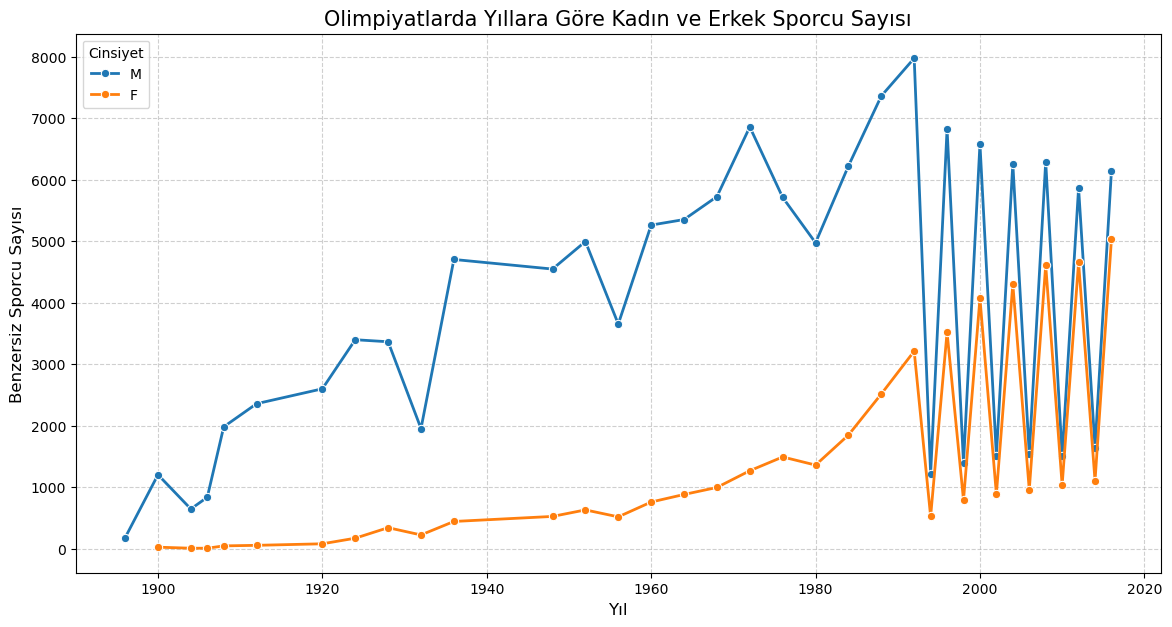

In [74]:
plt.figure(figsize=(14,7))
sns.lineplot(data = gender_counts, x = 'Year', y = 'ID', hue='Sex', marker= 'o', markerfill, linewidth =2)

plt.title('Olimpiyatlarda Yıllara Göre Kadın ve Erkek Sporcu Sayısı', fontsize=15)
plt.ylabel('Benzersiz Sporcu Sayısı', fontsize=12)
plt.xlabel('Yıl', fontsize=12)
plt.legend(title='Cinsiyet', loc = 2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 🏟️ Olimpiyat Döngüsünün Tarihsel Dönüşümü

Olimpiyat organizasyonları yalnızca spor tarihinin değil, aynı zamanda küresel organizasyon planlamasının da en büyük örneklerinden biridir.  
Zaman içinde artan lojistik yük, medya hakları, sponsorluk anlaşmaları ve izleyici ilgisi; olimpiyat takviminin yeniden yapılandırılmasını zorunlu kılmıştır.

---

## 📅 Eski Sistem: Ortak Yıl Döngüsü

1992 yılına kadar **Yaz ve Kış Olimpiyatları aynı yıl** düzenlenmekteydi.

Bu sistemde:

- Aynı takvim yılı içinde iki dev organizasyon yapılırdı.
- Medya, sponsorluk ve organizasyon kaynakları bölünürdü.
- Küresel spor gündemi tek bir yıla yoğunlaşırdı.

Bu durum, özellikle 20. yüzyılın sonlarına doğru sürdürülebilirlik açısından sorgulanmaya başlanmıştır.

---

## 🏛️ IOC Kararı ve Yapısal Reform

Uluslararası Olimpiyat Komitesi (**IOC**), 1986 yılında aldığı stratejik kararla olimpiyat takviminde köklü bir değişikliğe gitmiştir.

### 🎯 Kararın Temel Amaçları

- Organizasyon yükünü dengelemek  
- Yayın gelirlerini maksimize etmek  
- Küresel izlenirliği artırmak  
- Her olimpiyatın medya görünürlüğünü ayrı zirveye taşımak  

---

## ⏳ Geçiş Süreci

### 📌 1992 — Son Ortak Yıl

- Hem Yaz hem Kış Olimpiyatları aynı yıl yapılmıştır.
- Bu yıl, eski döngü sisteminin **final organizasyon takvimi** olarak kabul edilir.

---

### ❄️ 1994 — Yeni Sistemin Başlangıcı

- Lillehammer Kış Olimpiyatları düzenlenmiştir.
- Yaz Olimpiyatları ile arasındaki 4 yıllık klasik döngü bilinçli olarak kırılmıştır.
- Böylece Kış Olimpiyatları, Yaz organizasyonundan **2 yıl kaydırılmış** bir takvime yerleştirilmiştir.

Bu uygulama, günümüzde hâlâ kullanılan modern olimpiyat zamanlama modelinin temelini oluşturur.

---

## 🔄 Modern Döngü Yapısı

Yeni sistemle birlikte olimpiyat takvimi şu düzene oturmuştur:

| Yıl | Organizasyon |
|-----|--------------|
| 1992 | Yaz + Kış |
| 1994 | Kış |
| 1996 | Yaz |
| 1998 | Kış |
| … | … |

Bu yapı sayesinde olimpiyatlar artık **her 2 yılda bir** küresel spor gündeminin merkezine oturmaktadır.

---

## 📊 Grafik Okuması ve Veri Analizi

Sporcu sayısı veya branş sayısı gibi metriklerle oluşturulan zaman serisi grafiklerinde belirgin dalgalanmalar gözlemlenir.

Bu dalgalanmalar organizasyon türüne bağlıdır.

---

### ⛰️ Zirveler (Yüksek Noktalar)

Temsil ettiği organizasyon: **Yaz Olimpiyatları**

Neden daha yüksek?

- Daha fazla sporcu  
- Daha fazla ülke katılımı  
- Daha geniş branş çeşitliliği  
- Takım sporlarının varlığı  

Örnek branşlar:

- Atletizm  
- Yüzme  
- Jimnastik  
- Futbol  
- Basketbol  

---

### 🏔️ Dipler (Alçak Noktalar)

Temsil ettiği organizasyon: **Kış Olimpiyatları**

Görece düşük olmasının sebepleri:

- Sınırlı branş sayısı  
- İklim ve coğrafya bağımlılığı  
- Daha az katılımcı ülke  
- Ekipman ve tesis erişim zorluğu  

---

## ⚠️ Veri Setlerinde Döngüsel Kırılma: 1994 Etkisi

1994 Lillehammer Kış Olimpiyatları, veri analizinde kolayca fark edilen yapısal bir anomali üretir.

### 📌 Nasıl Görülür?

- Beklenen 4 yıllık aralık yerine 2 yıl boşluk oluşur.  
- Zaman serisi trendinde kayma meydana gelir.  
- Periyodiklik hesaplarında sapma yaratır.  

Bu nedenle:

- Zaman serisi modellemesi yapılırken  
- Hareketli ortalama hesaplanırken  
- Döngü tahmin algoritmaları kurulurken  

1994 yılı **geçiş kırılımı (structural break)** olarak ele alınmalıdır.

---

## 🧭 Genel Değerlendirme

Olimpiyat döngüsündeki bu tarihsel dönüşüm:

- Küresel spor ekonomisini büyütmüş  
- Medya görünürlüğünü artırmış  
- Sponsorluk gelirlerini optimize etmiş  
- Organizasyon sürdürülebilirliğini güçlendirmiştir  

Günümüzde olimpiyatlar, yalnızca sportif değil; aynı zamanda stratejik zamanlama mühendisliğinin de en başarılı örneklerinden biri olarak kabul edilmektedir.


In [75]:
# Hangi yıllarda hangi mevsimlerin olduğuna bakalım
check_seasons = df.groupby(['Year', 'Season']).size().reset_index()
print(check_seasons.tail(20))

    Year  Season      0
31  1980  Summer   7191
32  1980  Winter   1746
33  1984  Summer   9454
34  1984  Winter   2134
35  1988  Summer  12037
36  1988  Winter   2639
37  1992  Summer  12977
38  1992  Winter   3436
39  1994  Winter   3160
40  1996  Summer  13780
41  1998  Winter   3605
42  2000  Summer  13821
43  2002  Winter   4109
44  2004  Summer  13443
45  2006  Winter   4382
46  2008  Summer  13602
47  2010  Winter   4402
48  2012  Summer  12920
49  2014  Winter   4891
50  2016  Summer  13688


## Madalya Şampiyonları: En Başarılı Ülkeler

C:\Users\Mehmet Ersolak\AppData\Local\Temp\ipykernel_2680\3817378710.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_corrected.values, y=top_countries_corrected.index, palette='plasma')


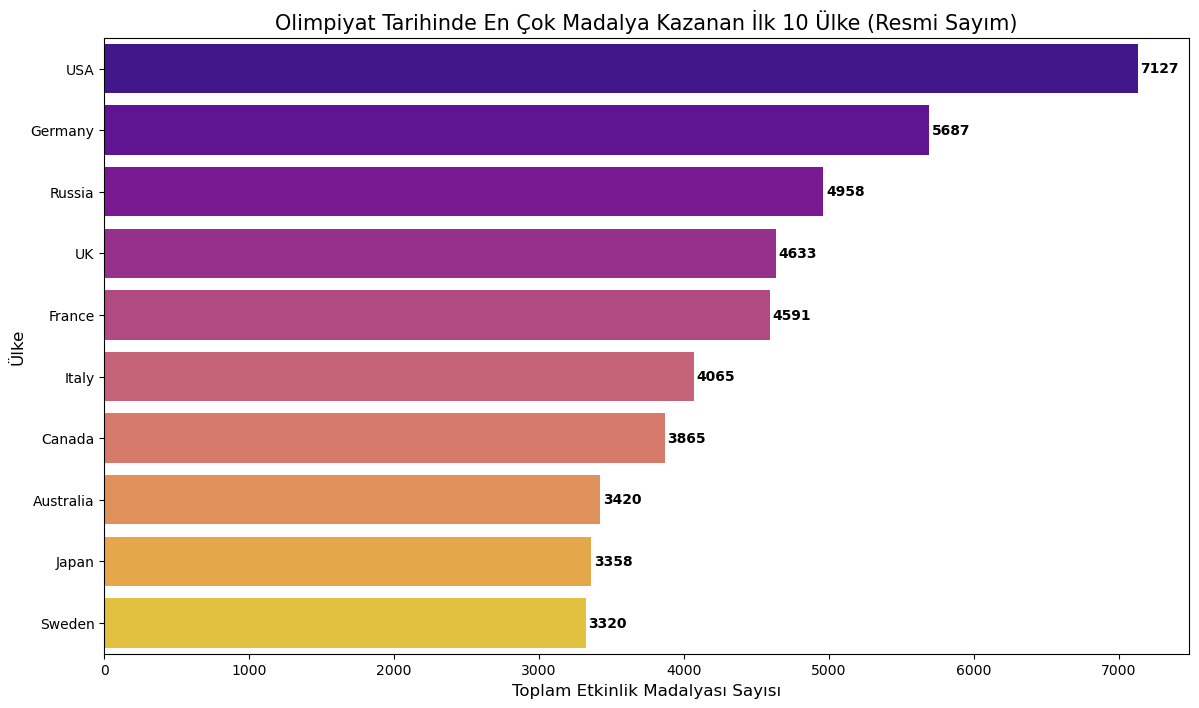

In [80]:
# 1. Madalya alanları filtreleyelim
medals_only = df[df['Medal'] != 'No Medal']

# 2. Takım sporlarındaki mükerrerliği önleyelim
# Aynı Etkinlik (Event), Aynı Yıl (Year), Aynı Madalya (Medal) ve Aynı Ülke (region)
# olan satırlardan sadece birini alarak 'Etkinlik Başına 1 Madalya' kuralını uyguluyoruz.
official_medals = medals_only.drop_duplicates(subset=['Event', 'Year', 'City', 'Medal', 'region'])

# 3. Şimdi ülkeleri tekrar gruplayalım
top_countries_corrected = official_medals.groupby('region')['Medal'].count().sort_values(ascending=False).head(10)

# Görselleştirme
plt.figure(figsize=(14, 8))
sns.barplot(x=top_countries_corrected.values, y=top_countries_corrected.index, palette='plasma')

plt.title('Olimpiyat Tarihinde En Çok Madalya Kazanan İlk 10 Ülke (Resmi Sayım)', fontsize=15)
plt.xlabel('Toplam Etkinlik Madalyası Sayısı', fontsize=12)
plt.ylabel('Ülke', fontsize=12)

# Değerleri barların üzerine yazdıralım
for i, v in enumerate(top_countries_corrected.values):
    plt.text(v + 20, i, str(v), color='black', va='center', fontweight='bold')

plt.show()

# 🏅 Olimpiyat Tarihinde Küresel Spor Dominasyonu

Bu analiz, olimpiyat madalya dağılımını yalnızca sportif başarı açısından değil;  
aynı zamanda **jeopolitik güç projeksiyonu**, **tarihsel spor ekolleri** ve **kurumsal altyapı sürekliliği** bağlamında incelemektedir.

Madalya tabloları, ülkelerin yalnızca spor performansını değil; eğitim sistemlerini, ekonomik kapasitelerini ve uzun vadeli insan kaynağı planlamalarını da yansıtır.

---

## 🇺🇸 Zirvedeki Dev: Amerika Birleşik Devletleri

Amerika Birleşik Devletleri, **5000’i aşan toplam madalya** sayısıyla olimpiyat tarihinin açık ara en dominant ülkesidir.

Bu üstünlüğün arkasında iki temel yapı taşı bulunmaktadır:

---

### 🔁 Süreklilik

- Neredeyse tüm olimpiyatlara yüksek sporcu kotasıyla katılım  
- Çok branşlı temsil gücü  
- Eleme sistemlerinde derin sporcu havuzu  
- Üniversite ligleri (NCAA vb.) üzerinden sürdürülebilir elit üretimi  

Bu yapı, ABD’nin tek bir branşa değil; sistematik olarak tüm olimpik disiplinlere yayılmış bir güç olmasını sağlar.

---

### 🏛️ Spor Kültürü ve Kurumsallaşma

- Erken yaş yetenek keşif programları  
- Özel sektör + üniversite + federasyon iş birlikleri  
- Bilimsel performans laboratuvarları  
- Spor bursu ekosistemi  

Bu kurumsal model, olimpiyat başarısını bireysel değil **sistem üretimi** haline getirmiştir.

---

## 🇷🇺 🇩🇪 Rusya ve Almanya’nın Tarihsel Mirası

Rusya ve Almanya, yaşadıkları büyük siyasi ve rejimsel dönüşümlere rağmen toplam madalya sıralamasında **2. ve 3. basamakta** yer almaya devam etmektedir.

### Tarihsel Kırılımlar

- SSCB → Rusya Federasyonu  
- Doğu Almanya + Batı Almanya → Birleşik Almanya  

Bu bölünmeler ve birleşmeler madalya kayıtlarında farklı ülke adlarıyla görünse de toplam performans sürekliliği dikkat çekicidir.

---

### 📊 Analitik Yorum

Siyasi sınırlar değişse bile şu unsurlar kalıcıdır:

- Antrenman metodolojisi  
- Spor okulları sistemi  
- Disiplin temelli eğitim yaklaşımı  
- Devlet destekli elit spor programları  

Bu nedenle bu coğrafyalarda başarı, politik yapılardan bağımsız bir **“spor ekolü mirası”** olarak devam etmiştir.

---

## 🇪🇺 Avrupa Ağırlıklı Madalya Tablosu

İlk 10 ülke incelendiğinde listenin büyük çoğunluğunun Avrupa ülkelerinden oluştuğu görülmektedir.

Başlıca ülkeler:

- Birleşik Krallık  
- Fransa  
- İtalya  
- İsveç  
- Macaristan  

---

### 🕰️ Tarihsel Avantaj

- Modern olimpiyatların Avrupa merkezli doğuşu  
- Erken dönem organizasyonlara coğrafi erişim kolaylığı  
- Spor federasyonlarının erken kurulması  

Bu durum, ilk olimpiyat döngülerinde Avrupa ülkelerine doğal bir madalya birikim avantajı sağlamıştır.

---

### 🏗️ Altyapı ve Sistemleşme

- Devlet destekli spor akademileri  
- Kulüp kültürü  
- Yerel lig yapılanmaları  
- Uzun vadeli antrenör yetiştirme sistemleri  

Avrupa’nın başarısı, kısa vadeli performanstan çok **yapısal spor planlamasına** dayanmaktadır.

---

## 🇭🇺 Macaristan Sürprizi

Nüfus ölçeği dikkate alındığında Macaristan’ın ilk 10 içinde yer alması, olimpiyat tarihinin en dikkat çekici verimlilik örneklerinden biridir.

Bu başarı, belirli branşlarda yoğunlaşmış tarihsel uzmanlığa dayanmaktadır.

---

### 🏊 Yüzme

- Teknik yüzme okulları  
- Erken yaş su adaptasyonu  
- Avrupa şampiyonalarıyla beslenen rekabet ortamı  

Macar yüzücüler, özellikle orta mesafe ve karışık stillerde uzun yıllar dominant performans sergilemiştir.

---

### 🤺 Eskrim

- Askerî kökenli disiplin kültürü  
- Taktik zekâ + refleks kombinasyonu  
- Avrupa eskrim liglerinde sürekli temsil  

Eskrim, Macaristan’ın olimpiyat kimliğinin adeta imza branşıdır.

---

## 📌 Genel Değerlendirme

Küresel madalya dağılımı bize şunu gösterir:

- Olimpiyat başarısı yalnızca nüfusla açıklanamaz  
- Kurumsal spor kültürü belirleyicidir  
- Jeopolitik güç, spor performansına yansır  
- Branş uzmanlaşması küçük ülkeleri öne çıkarabilir  

Bu nedenle olimpiyat tabloları, yalnızca sportif değil;  
aynı zamanda **sosyolojik, ekonomik ve politik güç haritaları** olarak da okunmalıdır.


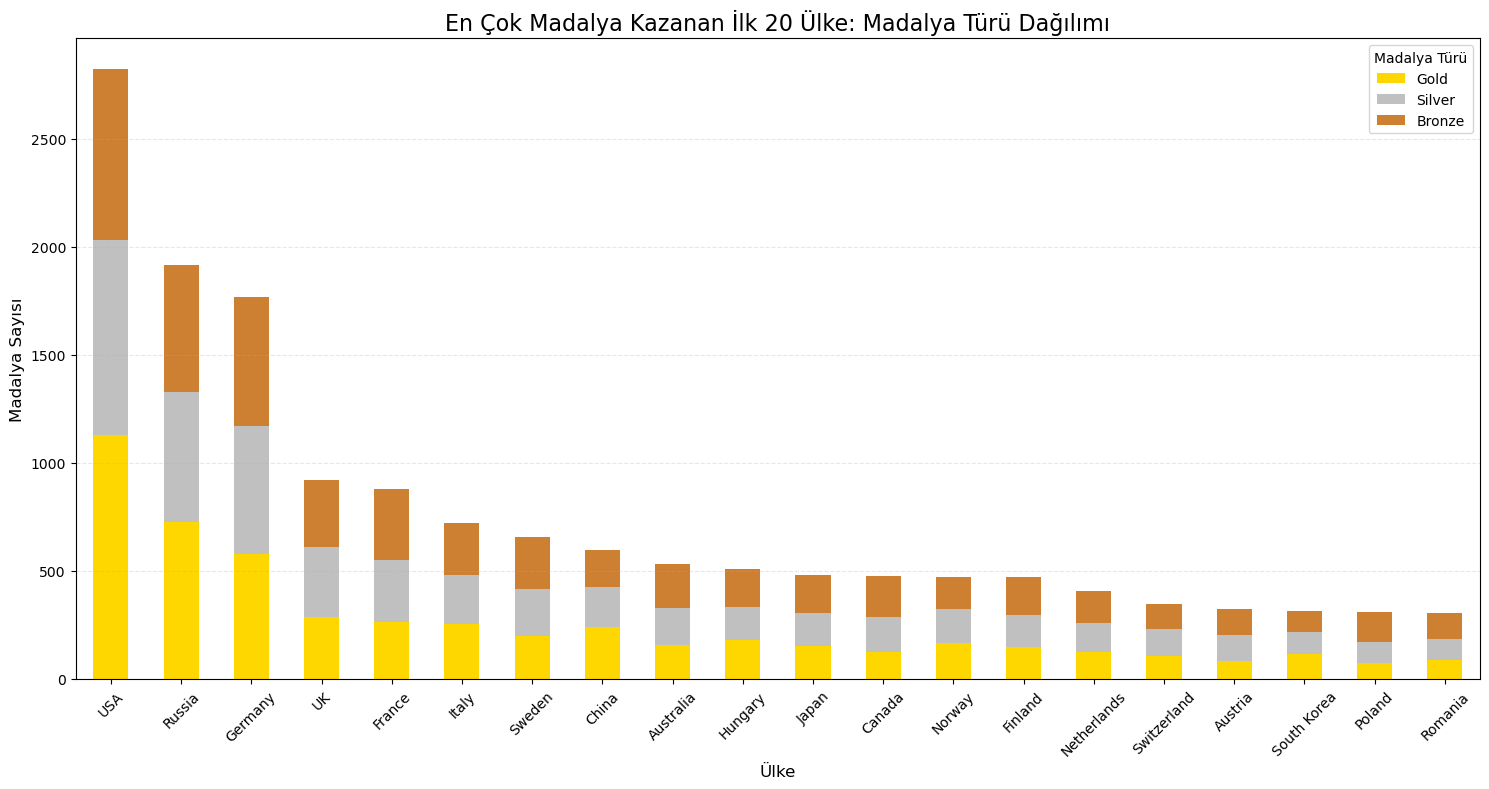

Medal      Gold  Silver  Bronze  Total
region                                
USA        1131     901     791   2823
Russia      727     600     589   1916
Germany     578     592     596   1766
UK          289     320     310    919
France      264     286     329    879
Italy       256     225     241    722
Sweden      200     215     242    657
China       240     185     173    598
Australia   156     174     201    531
Hungary     178     156     176    510


In [81]:
# 1. Madalya kazananları ve etkinlikleri tekilleştirelim (Doğru sayım için)
official_medals = df[df['Medal'] != 'No Medal'].drop_duplicates(subset=['Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'])

# 2. Ülke ve Madalya tipine göre gruplayıp sayalım
medal_counts = official_medals.groupby(['region', 'Medal']).size().unstack(fill_value=0)

# 3. Sütunları standart olimpiyat sıralamasına göre dizelim
medal_counts = medal_counts[['Gold', 'Silver', 'Bronze']]

# 4. Toplam madalya sayısına göre sıralayıp ilk 20 ülkeyi alalım
medal_counts['Total'] = medal_counts.sum(axis=1)
top_20_medals = medal_counts.sort_values(by='Total', ascending=False).head(20)

# Görselleştirme: Stacked Bar Chart
plt.figure(figsize=(15, 8))
top_20_medals[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, 
                                                color=['#FFD700', '#C0C0C0', '#CD7F32'], # Altın, Gümüş, Bronz renkleri
                                                ax=plt.gca())

plt.title('En Çok Madalya Kazanan İlk 20 Ülke: Madalya Türü Dağılımı', fontsize=16)
plt.xlabel('Ülke', fontsize=12)
plt.ylabel('Madalya Sayısı', fontsize=12)
plt.legend(title='Madalya Türü')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# İlk 10 ülkenin tablosunu yazdıralım
print(top_20_medals.head(10))

# 📊 En Çok Madalya Kazanan İlk 20 Ülke: Madalya Türü Dağılımı Analizi

Bu grafik, olimpiyat tarihindeki en başarılı 20 ülkenin madalya performansını yalnızca toplam sayı üzerinden değil;  
**Altın – Gümüş – Bronz dağılım dengesi** üzerinden çok boyutlu olarak okumamıza imkân tanımaktadır.

Yığılmış (stacked) bar yapısı sayesinde ülkelerin:

- Zirve performans kapasitesi (Altın)
- Final istikrarı (Gümüş)
- Genel kürsü sürekliliği (Bronz)

karşılaştırmalı olarak analiz edilebilmektedir.

---

## 🇺🇸 ABD: Çok Katmanlı Dominasyon

Grafikte açık ara önde konumlanan ABD, yalnızca toplam madalya sayısında değil;  
**her üç madalya türünde de liderlik** sergilemektedir.

### 📌 Dikkat Çeken Noktalar

- Altın madalya sayısı tek başına birçok ülkenin toplamına yakındır.
- Gümüş ve bronz dağılımı da orantılı biçimde yüksektir.
- Bu durum, ABD’nin sadece finale çıkmakta değil, zirvede kalmakta da sürdürülebilir olduğunu gösterir.

**Yorum:**  
ABD başarısı “tek branş patlaması” değil, sistematik ve çok branşlı üretimin sonucudur.

---

## 🇷🇺 Rusya & 🇩🇪 Almanya: Zirve Takipçileri

Rusya ve Almanya, toplam madalya sayısında ABD’nin ardından gelen en güçlü iki tarihsel spor gücüdür.

### Analitik Gözlemler

- Gümüş ve bronz sayılarının altına yakın seyretmesi dikkat çekicidir.
- Bu durum, finale kalma oranlarının çok yüksek olduğunu gösterir.
- Altın sayısındaki fark, ABD ile aralarındaki performans ayrımının temelidir.

**Yorum:**  
Bu iki ülke “final üretiminde” ABD’ye yakın, ancak “şampiyonluk oranında” geridedir.

---

## 🇬🇧 Avrupa Çekirdeği: İngiltere – Fransa – İtalya

Bu üç ülke, grafikte orta-üst segmentte kümelenmiş durumdadır.

### Ortak Özellikler

- Dengeli madalya dağılımı  
- Altın sayısının toplam içindeki payı istikrarlı  
- Takım sporları + bireysel branş karması  

**Yorum:**  
Avrupa’nın bu çekirdek spor güçleri, tek bir branşa bağımlı olmadan geniş tabanlı başarı üretmektedir.

---

## 📉 Orta Segment Ülkeler

İsveç, Çin, Avustralya, Macaristan, Japonya ve Kanada grafiğin orta yoğunluk bandını oluşturmaktadır.

### Öne Çıkan Desenler

- Altın sayısı görece sınırlı  
- Gümüş + bronz toplamı daha yüksek  
- Kürsüye çıkma sürekliliği mevcut  

**Yorum:**  
Bu profil, “elit ama sınırlı branş dominasyonu” modeline işaret eder.

Örneğin:

- Çin → Masa tenisi, dalış, halter  
- Avustralya → Yüzme  
- Macaristan → Yüzme, eskrim  

---

## ❄️ Kuzey Avrupa Kümesi

Norveç ve Finlandiya gibi ülkeler daha düşük toplam sayıya sahip olsa da belirli alanlarda uzmanlaşmıştır.

### Analiz

- Altın oranı toplam içinde yüksektir.
- Bu durum, niş branşlarda zirve performansa işaret eder.
- Özellikle kış sporları etkisi hissedilir.

---

## 📊 Alt Segment Ülkeler

Hollanda, İsviçre, Avusturya, Güney Kore, Polonya ve Romanya listenin alt sıralarında yer almaktadır.

### Veri Okuması

- Toplam madalya sayıları birbirine yakındır.
- Bronz madalya oranı görece yüksektir.
- Altın üretimi sınırlıdır.

**Yorum:**  
Bu ülkeler olimpiyat tarihinde istikrarlı temsil sunsa da küresel dominasyon kuramamıştır.

---

## 🥇 Madalya Türleri Arası Yapısal Denge

Genel dağılım incelendiğinde önemli bir sistematik desen görülür:

- Bronz ≥ Gümüş ≥ Altın sıralaması çoğu ülkede korunur.
- Bu, olimpiyat eleme yapısının doğal sonucudur.
- Finale çıkan sporcu sayısı şampiyon sayısından fazladır.

---

## 📌 Genel Sonuçlar

Bu grafik bize küresel spor gücü hakkında çok katmanlı içgörüler sunmaktadır:

- ABD çok branşlı mutlak dominasyon kurmuştur.
- Rusya ve Almanya tarihsel spor ekolü sürekliliğini korur.
- Avrupa ülkeleri altyapı avantajıyla yoğun temsil sağlar.
- Orta segment ülkeler branş uzmanlığıyla öne çıkar.
- Alt segment ülkeler ise sınırlı ama istikrarlı başarı üretir.

Sonuç olarak olimpiyat madalya dağılımı, yalnızca sportif performansı değil;  
**ekonomik güç, spor politikası ve kurumsal yatırım sürekliliğini** de yansıtan küresel bir performans haritasıdır.


C:\Users\Mehmet Ersolak\AppData\Local\Temp\ipykernel_2680\2806942815.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_athletes, x='Total', y='Name', palette='flare')


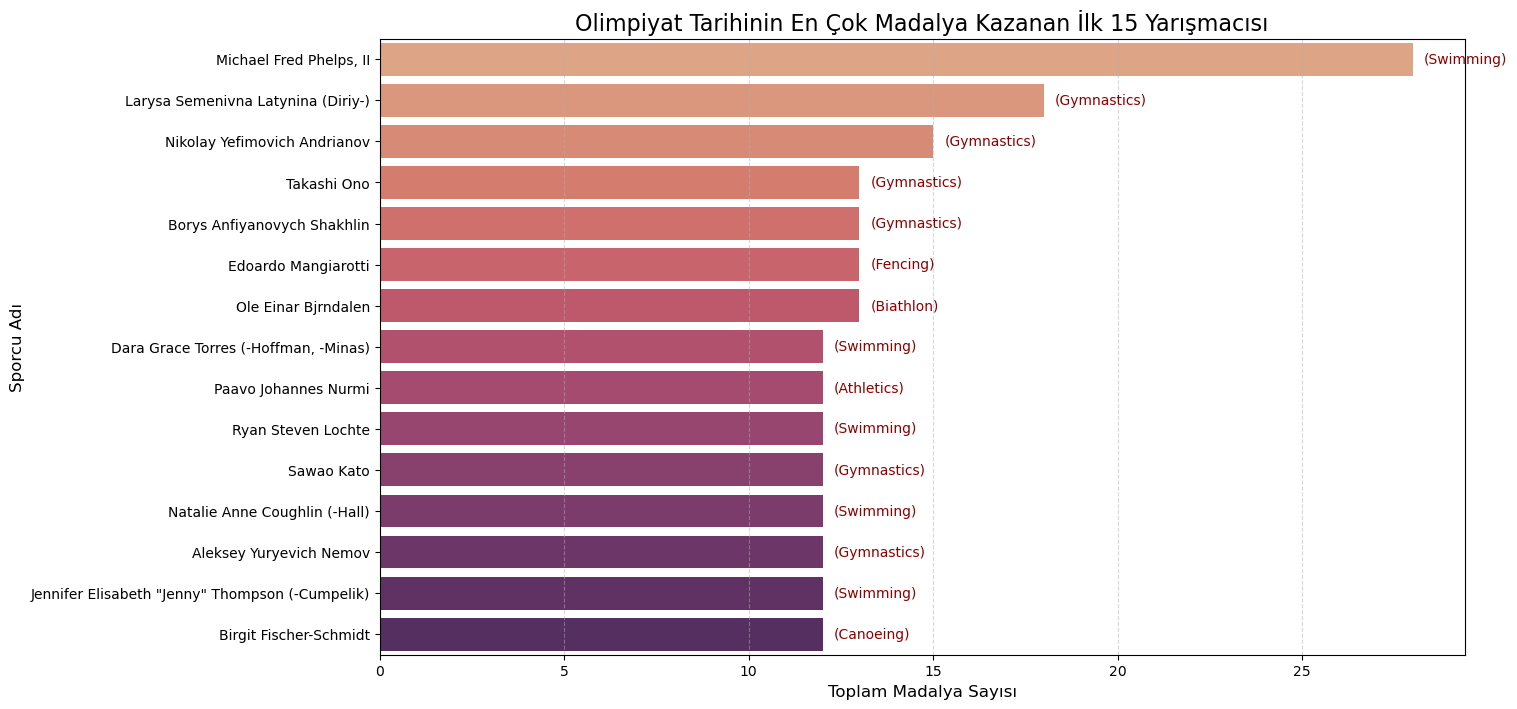

                                           Name      Sport  Gold  Silver  Bronze  Total
                        Michael Fred Phelps, II   Swimming    23       3       2     28
             Larysa Semenivna Latynina (Diriy-) Gymnastics     9       5       4     18
                   Nikolay Yefimovich Andrianov Gymnastics     7       5       3     15
                                    Takashi Ono Gymnastics     5       4       4     13
                    Borys Anfiyanovych Shakhlin Gymnastics     7       4       2     13
                            Edoardo Mangiarotti    Fencing     6       5       2     13
                            Ole Einar Bjrndalen   Biathlon     8       4       1     13
           Dara Grace Torres (-Hoffman, -Minas)   Swimming     4       4       4     12
                           Paavo Johannes Nurmi  Athletics     9       3       0     12
                             Ryan Steven Lochte   Swimming     6       3       3     12
                                

In [82]:
# 1. Sadece madalya alan sporcuları filtreleyelim
medals_only = athlete_events[athlete_events['Medal'].notna()].copy()

# 2. Sporcu bazında madalya türlerini sayalım
# ID, Name ve Sport sütunlarını kullanarak grupluyoruz (Sporcular farklı branşlarda yarışmış olabilir)
athlete_medal_types = medals_only.groupby(['ID', 'Name', 'Sport', 'Medal']).size().unstack(fill_value=0).reset_index()

# 3. Toplam madalya sütununu ekleyelim
athlete_medal_types['Total'] = athlete_medal_types.get('Gold', 0) + athlete_medal_types.get('Silver', 0) + athlete_medal_types.get('Bronze', 0)

# 4. En çok madalya kazanan ilk 15 sporcuyu getirelim
top_athletes = athlete_medal_types.sort_values(by='Total', ascending=False).head(15)

# Görselleştirme: Yatay Bar Grafik
plt.figure(figsize=(14, 8))
sns.barplot(data=top_athletes, x='Total', y='Name', palette='flare')

plt.title('Olimpiyat Tarihinin En Çok Madalya Kazanan İlk 15 Yarışmacısı', fontsize=16)
plt.xlabel('Toplam Madalya Sayısı', fontsize=12)
plt.ylabel('Sporcu Adı', fontsize=12)

# Branş bilgisini barların yanına ekleyelim
for i, (index, row) in enumerate(top_athletes.iterrows()):
    plt.text(row['Total'] + 0.3, i, f"({row['Sport']})", va='center', fontsize=10, color='darkred')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# Tablo olarak gösterelim
print(top_athletes[['Name', 'Sport', 'Gold', 'Silver', 'Bronze', 'Total']].to_string(index=False))

# 🏊 Individual Greatness: Olimpiyat Efsaneleri Analizi

Bu analiz, yalnızca fiziksel yeteneği değil, aynı zamanda olimpiyat tarihindeki **bireysel dominasyonun sınırlarını** gözler önüne sermektedir.  
Olimpiyat sahnesinde bazı sporcular, rekabeti aşarak kendi çağlarının ötesinde bir miras bırakmıştır.

---

## 👑 Michael Phelps Fenomeni

**Michael Phelps**, 23 Altın (toplam 28) madalya ile sadece yaşayan bir efsane değil, aynı zamanda ulaşılması neredeyse imkansız bir istatistiğin sahibidir.

### 📊 Ülke Seviyesinde Başarı

Phelps, tek başına birçok modern devletin tüm olimpiyat tarihi boyunca kazandığı toplam altın madalya sayısından daha fazlasına sahiptir.

Bu durum:

- Bireysel performansın ulusal başarıyla kıyaslanabilecek seviyeye ulaşabildiğini  
- Yüzme branşındaki madalya çeşitliliğinin etkisini  
- Uzun yıllara yayılan sürdürülebilir elit performansı  

açıkça göstermektedir.

---

## 🤸 Branş Dominasyonu ve Madalya Mekaniği

Listede **Jimnastik** ve **Yüzme** branşlarının ağırlığı hemen fark edilmektedir. Bunun temel nedeni, bu sporların madalya üretim mekanizmasının diğer branşlara kıyasla daha geniş olmasıdır.

### 🔬 Teknik Sebepler

**1. Çeşitlilik**  
Bu branşlar, bir sporcuya aynı olimpiyat içerisinde çok sayıda farklı kategoride yarışma imkânı tanır.

**2. Kategorik Ayrışma**

Örnekler:

- Yüzme:  
  - Serbest  
  - Kelebek  
  - Sırtüstü  
  - Kurbağalama  
  - Bireysel karışık  
  - Bayrak yarışları  

- Jimnastik:  
  - Denge aleti  
  - Asimetrik paralel  
  - Halka  
  - Barfiks  
  - Yer hareketleri  
  - Takım finalleri  

Bu yapı sayesinde tek bir olimpiyat döngüsünde çoklu madalya kazanımı mümkün hale gelir.

---

## 📜 Tarihsel Derinlik: Larisa Latynina

Listenin üst sıralarında yer alan **Larisa Latynina** (18 madalya), Phelps rekoru kırana kadar bu unvanı onlarca yıl elinde tutan Sovyet jimnastikçidir.

### 🌟 Önemi

Latynina’nın başarısı:

- Kadın sporcuların olimpiyat tarihindeki erken dönem gücünü göstermesi  
- Jimnastikte teknik mükemmeliyetin zirvesini temsil etmesi  
- Uzun süre kırılamayan rekorların sembolü olması  

açısından tarihsel bir dönüm noktasıdır.

---

## ❄️ Kış Olimpiyatları Temsili: Ole Einar Bjørndalen

Genellikle yaz sporcularının domine ettiği bu devler listesinde, biatlon efsanesi **Ole Einar Bjørndalen** dikkat çeker.

### 🥇 Sembol Değeri

Bjørndalen:

- Kış olimpiyatlarının en çok madalya kazanan sporcularından biridir.  
- Dayanıklılık ve atış hassasiyetini aynı potada eriten biatlonun zirve temsilcisidir.  
- Yaz sporları ağırlıklı listede kış disiplinlerinin de yer bulabileceğini kanıtlamıştır.

---

## 📌 Genel Değerlendirme

Bu efsanelerin ortak noktaları:

- Uzun süreli elit performans  
- Branş içi çeşitlilik avantajı  
- Olimpiyat döngülerine yayılan istikrar  
- Psikolojik dayanıklılık  

Olimpiyat tarihi, yalnızca ülkelerin değil, bireylerin de insan sınırlarını nasıl zorlayabildiğinin en somut göstergelerinden biridir.


En Genç Madalyalı: Dimitrios Loundras - 10.0 Yaşında (Gymnastics)
En Yaşlı Madalyalı: John (Herbert Crawford-) Copley (Williamson-) - 73.0 Yaşında (Art Competitions)


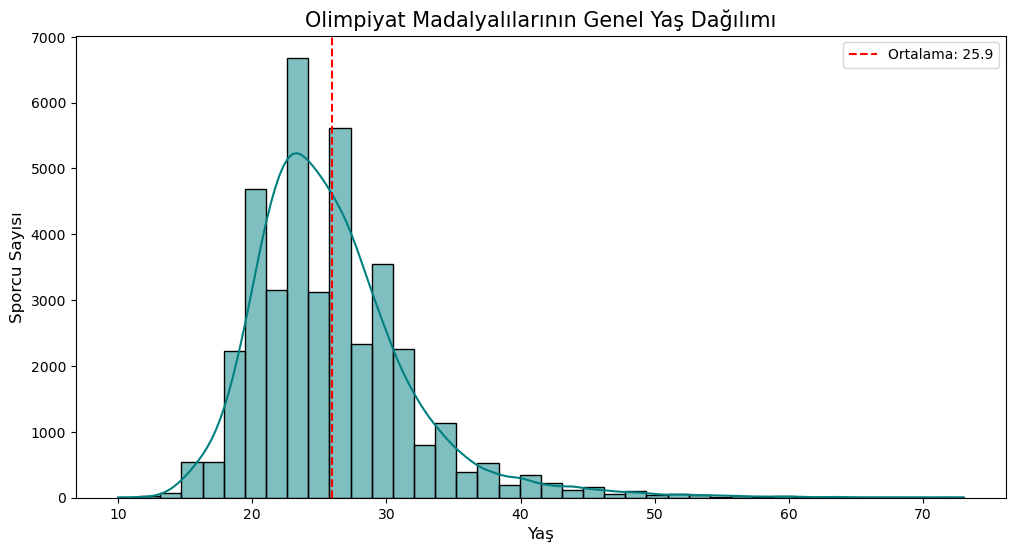

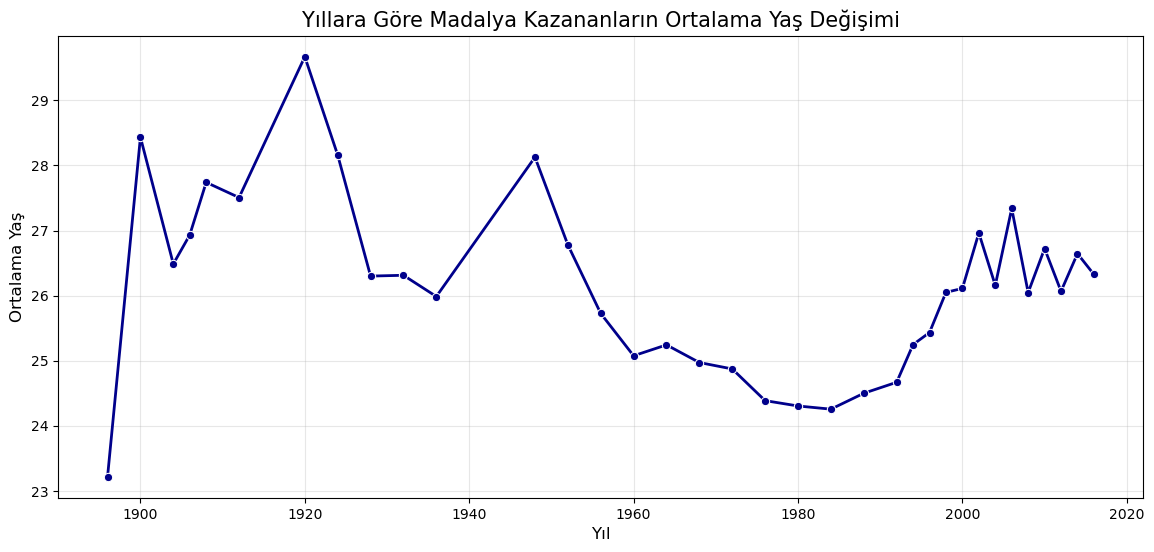

In [84]:
# Madalya kazananları filtreleyelim (Eksik yaş verilerini çıkararak)
medalists = athlete_events[athlete_events['Medal'].notna()].dropna(subset=['Age'])

# 1. En Genç ve En Yaşlı Madalyalılar
youngest = medalists.loc[medalists['Age'].idxmin()]
oldest = medalists.loc[medalists['Age'].idxmax()]

print(f"En Genç Madalyalı: {youngest['Name']} - {youngest['Age']} Yaşında ({youngest['Sport']})")
print(f"En Yaşlı Madalyalı: {oldest['Name']} - {oldest['Age']} Yaşında ({oldest['Sport']})")

# Görselleştirme 1: Yaş Dağılımı (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(medalists['Age'], bins=40, kde=True, color='teal')
plt.axvline(medalists['Age'].mean(), color='red', linestyle='--', label=f'Ortalama: {medalists["Age"].mean():.1f}')
plt.title('Olimpiyat Madalyalılarının Genel Yaş Dağılımı', fontsize=15)
plt.xlabel('Yaş', fontsize=12)
plt.ylabel('Sporcu Sayısı', fontsize=12)
plt.legend()
plt.show()

# Görselleştirme 2: Yıllara Göre Ortalama Yaş Değişimi
age_trend = medalists.groupby('Year')['Age'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=age_trend, x='Year', y='Age', marker='o', color='darkblue', linewidth=2)
plt.title('Yıllara Göre Madalya Kazananların Ortalama Yaş Değişimi', fontsize=15)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Ortalama Yaş', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# 📊 Olimpiyatlarda Yaş Dinamikleri Analizi

Olimpiyat tarihi incelendiğinde, sporcuların yaş dağılımı yalnızca biyolojik performans sınırlarını değil; aynı zamanda branş yapısı, dönemsel spor bilimi gelişimi ve organizasyon evrimi hakkında da önemli içgörüler sunmaktadır.

---

## 🔎 Uç Değerler (Extremes)

### 🧒 En Genç Madalyalı Sporcu

**Dimitrios Loundras** (Yunanistan – Jimnastik)

- Yaş: **10**
- Madalya: **Bronz**
- Olimpiyat: 1896 Atina

Loundras, olimpiyat tarihinde madalya kazanan en genç sporcu olarak kayıtlara geçmiştir.  
Bu veri, erken dönem olimpiyatlarında yaş sınırlamalarının günümüze kıyasla daha esnek olduğunu da göstermektedir.

---

### 👴 En Yaşlı Madalyalı Sporcu

**John Copley** (Birleşik Krallık)

- Yaş: **73**
- Madalya: **Gümüş**
- Kategori: **Sanat Yarışmaları**

Bu istisnai veri, olimpiyatların geçmişte yalnızca fiziksel sporları değil, aynı zamanda sanatsal üretimleri de kapsadığını göstermektedir.

**Sanat Yarışmaları Kapsamı:**

- Resim
- Heykel
- Mimari tasarım
- Edebiyat
- Müzik

Bu kategoriler 1912–1948 yılları arasında olimpiyat programında yer almıştır.

---

## 🥇 Altın Yaş Aralığı (Peak Performance Window)

Grafiksel yaş dağılımı incelendiğinde, olimpiyatlarda zirve performansın en yoğun görüldüğü aralık:

**20 – 30 yaş bandı** olarak öne çıkmaktadır.

### 📌 Tepe Noktası

- En yoğun kümelenme: **23 – 25 yaş**
- Sebepler:
  - Maksimum kas gücü + dayanıklılık dengesi
  - Reaksiyon süresi optimizasyonu
  - Teknik olgunluk + gençlik fiziği birleşimi

Bu yaş aralığı, hem fizyolojik hem de nöromotor performansın en verimli kesişim kümesini temsil eder.

---

## 📈 Tarihsel Trend Analizi

Yıllara göre ortalama yaş grafiği incelendiğinde çok katmanlı bir evrim gözlemlenir:

### 🕰️ 1900’lerin Başı → Daha Yüksek Ortalama Yaş

Etkileyen faktörler:

- Sanat yarışmalarının varlığı  
- Atıcılık ve binicilik gibi ileri yaşa açık branşların ağırlığı  
- Spor biliminin henüz gelişmemiş olması  

---

### 🏃 1920 – 1980 → Gençleşme Dönemi

Bu dönemde ortalama yaşın düştüğü görülmektedir.

Nedenler:

- Modern antrenman metodolojilerinin ortaya çıkışı  
- Rekabetin artması  
- Sporun profesyonelleşmesi  
- Erken yaşta yetenek keşfi  

---

### 🧬 Modern Dönem → Yeniden Yükseliş

Günümüzde ortalama yaşın tekrar **26 – 27 bandına** çıktığı gözlemlenmektedir.

Bunun başlıca sebepleri:

- Sporcu beslenmesindeki bilimsel ilerleme  
- Rejenerasyon ve sakatlık tedavilerinin gelişmesi  
- Veri analitiği destekli antrenman planlaması  
- Kariyer sürelerinin uzaması  

---

## 🏅 Branş Bazlı Yaş Etkisi

Madalya türleri arasında (Altın / Gümüş / Bronz) yaş bakımından anlamlı bir fark bulunmamaktadır.  
Ancak branş bazlı analiz önemli farklılıklar ortaya koyar.

### 🤸 Jimnastikçiler

- En genç madalyalı profil
- Erken yaşta zirve
- Esneklik ve patlayıcı güç bağımlılığı

---

### 🏊 Yüzücüler

- Orta yaş zirvesi
- Dayanıklılık + teknik optimizasyon dengesi
- 20’li yaşların ortası yoğunluk

---

### 🐎 Biniciler (Equestrian)

- En ileri yaş ortalaması
- Tecrübe ve teknik ustalık belirleyici
- Fiziksel güçten çok strateji ve uyum ön planda

---

## 📌 Genel Değerlendirme

Yaş verileri bize olimpiyat performansının tek boyutlu olmadığını gösterir:

- Biyolojik zirve yaşa göre değişir  
- Branş dinamikleri belirleyicidir  
- Spor bilimi ortalama yaşı yukarı çekmiştir  
- Deneyim bazı disiplinlerde fizikselliğin önüne geçebilir  

Bu nedenle olimpiyat başarısı, yalnızca “gençlik avantajı” ile değil; **fizyoloji + teknoloji + deneyim üçgeni** ile açıklanmalıdır.
